In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy() # perch_full(농어)
# 데이터 속성 - 길이, 높이 , 너비
print(perch_full.shape)
print(perch_full[:3])

(56, 3)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]]


In [30]:
# csv에 농어 무게 데이터가 없으므로 별도 추가
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
# print(perch_weight.shape)

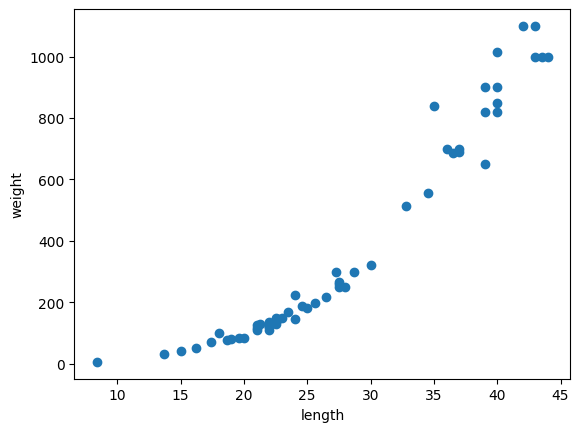

In [31]:
# 길이와 무게의 상관 관계
perch_length = perch_full[:, 0]
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [33]:
print(train_input.shape, test_input.shape)
print(test_input)

(42,) (14,)
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [34]:
# 사이킷런 모델은 2차원 배열 형태여야 함
# -1 : 모든 원소, 전체 개수를 몰라도 됨
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

lr = LinearRegression()
lr.fit(train_input, train_target)
print("농어 길이 50cm일때, 무게는?", lr.predict([[50]]))
print("train 데이터 셋 정학도", lr.score(train_input, train_target))
print("test 데이터 셋 정확도", lr.score(test_input, test_target))

농어 길이 50cm일때, 무게는? [1241.83860323]
train 데이터 셋 정학도 0.9398463339976041
test 데이터 셋 정확도 0.824750312331356


[39.01714496] -709.0186449535474


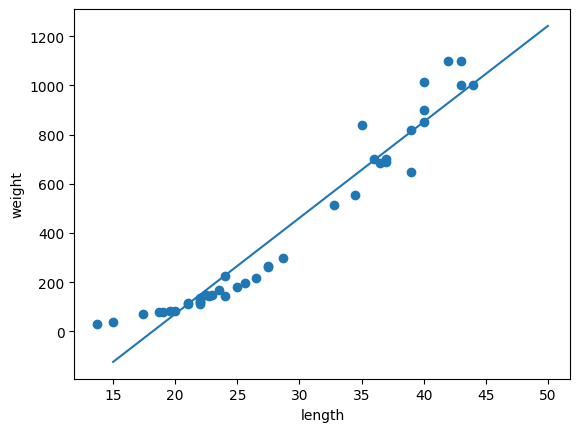

In [35]:
# 기울기, 절편
print(lr.coef_, lr.intercept_)

# y = lr.coef_ * x +  lr.intercept_
# 15 ~ 50까지 1차 방정식 그래프를 그린다
# -> (15, [lr.coef_ * 15 + lr.intercept_]) 점과 (50,[lr.coef_ * 50 + lr.intercept_]) 점

plt.plot([15,50], [lr.coef_ * 15 + lr.intercept_, lr.coef_ * 50 + lr.intercept_])
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [36]:
# 2차 방정식으로 넣어보기
# 기존 열에 제곱 열 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr.fit(train_poly, train_target)

# 50cm 농어 예측이 제곱한 값을 첫번째 열로 추가(위에서 넣기 때문에 식이 같아야 함)
print(lr.predict([[50**2, 50]]))
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[1573.98423528]
0.9706807451768623
0.9775935108325122


[  1.01433211 -21.55792498] 116.0502107827827


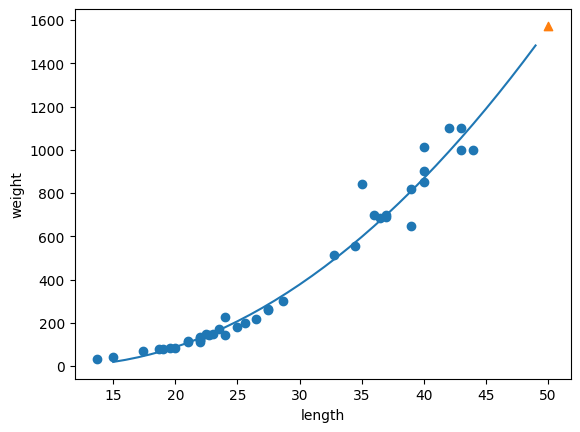

In [37]:
print(lr.coef_, lr.intercept_)

point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)
plt.scatter(50, 1573, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [38]:
# 위는 농어의 길이만을 이용하였으며, 아래는 길이 높이 너비 3가지 이용

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42, 3) (14, 3)
(42,) (14,)


In [39]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# x,  y,  x^2,  xy,  y^2,  x^3,  x^2y,  xy^2,  y^3

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [40]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [41]:
print(train_poly.shape)

(42, 9)


In [42]:
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [44]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982126
0.9714559911594125
